<a href="https://colab.research.google.com/github/preenet/961701_65/blob/main/961701_65_week7_KDD_in_action_quick_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KDD in action demonstrate to students 961701
# pree.t@cmu.ac.th
# In this notebook, I break down each step to analyze tabular data in detail.
# You can improve performance of the model, by carefully apply techniques that you have learned in the class.(this is just the rough one.)

In [2]:
# we also import nessesary libs 
import pandas as pd # for data manu.
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# change directory where you uploaded the dataset.
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
# read the dataset using pandas
df = pd.read_csv('week3_2.csv')

# Data Understanding (EDA) + selection

In [6]:
# I usually peak the top rows to see headers and try to understand what are they (e.g., X, y)
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [7]:
# lets' look the dimension of the dataset, it looks like we have few sample to train, so we need to carefull clean them.
df.shape

(215, 15)

In [8]:
# Descriptive statistics can provide a wealth of information about each feature.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


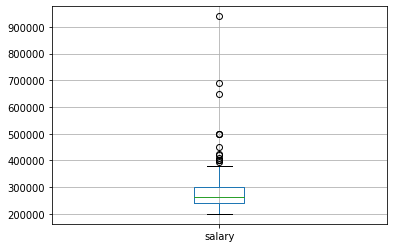

In [9]:
df.boxplot(column=['salary'])

In [10]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c6e0a0a50>,
      dtype=object)

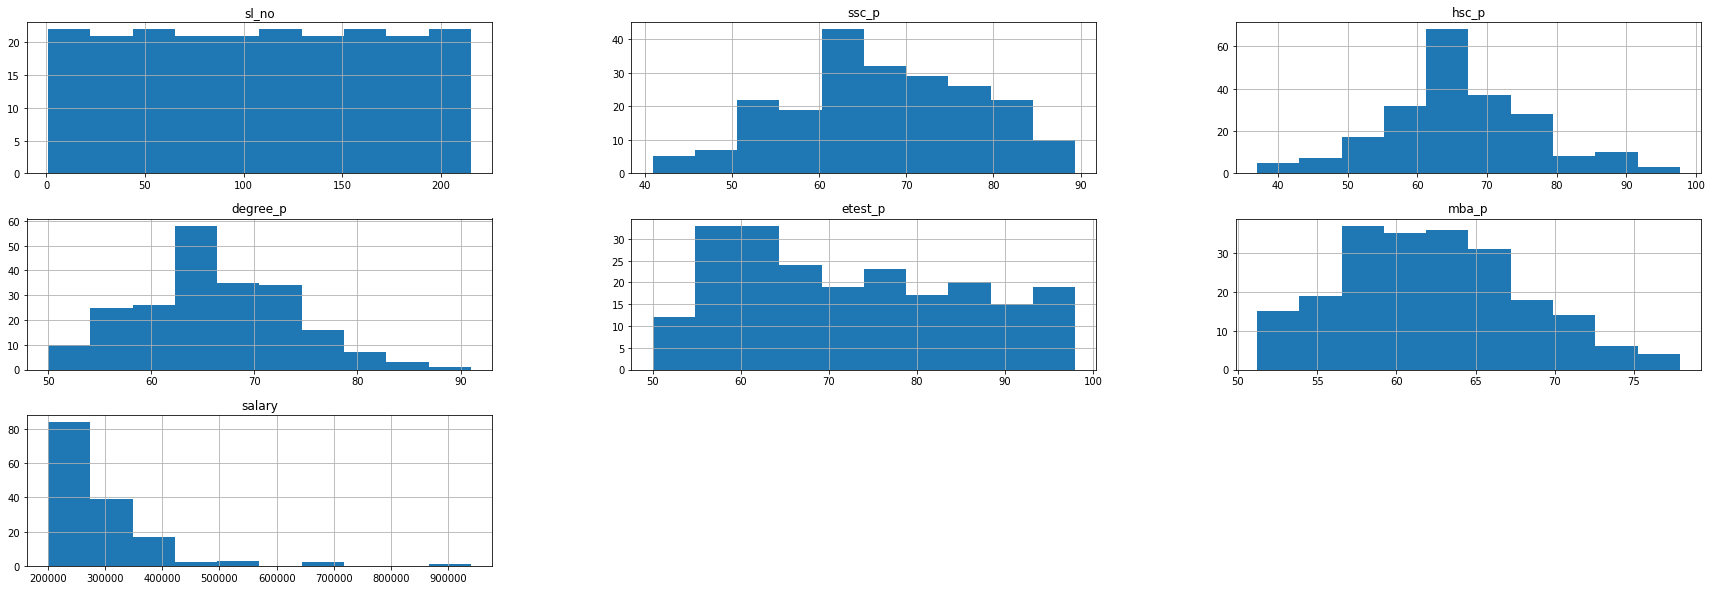

In [11]:
df.hist(figsize=(30, 10))

# Pre-processing 

> Indented block



In [12]:
# Recall what we have learned, check the missing value, follow the rules of thumbs, and remedy them
df['salary'] = df['salary'].fillna(0)

# Transformation

In [13]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
# encoded the nominal feature just like we did on previous workshop
df = pd.get_dummies(df, prefix='gender', columns=['gender'], drop_first=False)
df = pd.get_dummies(df, prefix='ssc_b', columns=['ssc_b'], drop_first=False)
df = pd.get_dummies(df, prefix='hsc_b', columns=['hsc_b'], drop_first=False)
df = pd.get_dummies(df, prefix='hsc_s', columns=['hsc_s'], drop_first=False)
df = pd.get_dummies(df, prefix='degree_t', columns=['degree_t'], drop_first=False)
df = pd.get_dummies(df, prefix='specialisation', columns=['specialisation'], drop_first=False)
df = pd.get_dummies(df, prefix='workex', columns=['workex'], drop_first=False)

In [15]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_No,workex_Yes
0,1,67.00,91.00,58.00,55.0,58.80,Placed,270000.0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,2,79.33,78.33,77.48,86.5,66.28,Placed,200000.0,0,1,...,0,0,1,0,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,Placed,250000.0,0,1,...,1,0,0,1,0,0,1,0,1,0
3,4,56.00,52.00,52.00,66.0,59.43,Not Placed,0.0,0,1,...,0,0,1,0,0,1,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,Placed,425000.0,0,1,...,0,1,0,1,0,0,1,0,1,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df['ssc_p'] = scaler.fit_transform(df[['ssc_p']])
df['hsc_p'] = scaler.fit_transform(df[['hsc_p']])
df['degree_p'] = scaler.fit_transform(df[['degree_p']])
df['etest_p'] = scaler.fit_transform(df[['etest_p']])
df['mba_p'] = scaler.fit_transform(df[['mba_p']])
df['salary'] = scaler.fit_transform(df[['salary']])

In [18]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_No,workex_Yes
0,1,0.538240,0.889621,0.195122,0.104167,0.284483,Placed,0.287234,0,1,...,0,1,0,0,0,1,0,1,1,0
1,2,0.792414,0.680890,0.670244,0.760417,0.564843,Placed,0.212766,0,1,...,0,0,1,0,0,1,1,0,0,1
2,3,0.497011,0.510708,0.341463,0.520833,0.247001,Placed,0.265957,0,1,...,1,0,0,1,0,0,1,0,1,0
3,4,0.311482,0.247117,0.048780,0.333333,0.308096,Not Placed,0.000000,0,1,...,0,0,1,0,0,1,0,1,1,0
4,5,0.925788,0.602965,0.568293,0.975000,0.160795,Placed,0.452128,0,1,...,0,1,0,1,0,0,1,0,1,0


In [19]:
X = df.iloc[:, df.columns != 'status']

In [20]:
df['status'] = df['status'].astype('category').cat.codes

In [21]:
y = df['status']

# Modeling

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 23), (43, 23), (172,), (43,))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3) # don't worry about parems here for now
clf.fit(X_train, y_train) # you need to make sure you understand what to put here, we use the training set

KNeighborsClassifier(n_neighbors=3)

# Evaluation and intrepret the results

In [24]:
y_pred = clf.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.627906976744186


In [26]:
# let take futher step by explore the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 4, 12],
       [ 4, 23]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


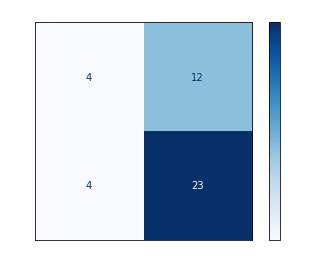

In [27]:
# the above matrix looks pretty ugly, lets decorate it!
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [28]:
# here are advanced metrix you can use to explore the performance of your classifier. (we will learn it after midterm.)
from sklearn.metrics import classification_report
print("Test set acc.", classification_report(y_test, y_pred))

Test set acc.               precision    recall  f1-score   support

           0       0.50      0.25      0.33        16
           1       0.66      0.85      0.74        27

    accuracy                           0.63        43
   macro avg       0.58      0.55      0.54        43
weighted avg       0.60      0.63      0.59        43



In [29]:
# lets tune the model (we haven't learn it yet, but just to let you see the roadmap of ML). lets use basic grid search here.
from sklearn.model_selection import GridSearchCV

# you can read more about the knn algo. here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# you can explore more about grid search here, if you don't quit get, its ok now. you can perform iterative search for one parem.

grid_params = { 'n_neighbors' :list(range(1, 30)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [30]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [31]:
clf2 = gs.fit(X_train, y_train)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits


In [32]:
# find the best score
clf2.best_score_

0.70359477124183

In [33]:
clf2.best_params_

{'metric': 'minkowski', 'n_neighbors': 27, 'weights': 'uniform'}

In [34]:
# now we found the best params, so lets use that for our final model
clf_final = KNeighborsClassifier(n_neighbors = 16, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
clf_final.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=16,
                     weights='distance')

In [35]:
y_pred = clf_final.predict(X_test)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6511627906976745


In [37]:
cm2 = confusion_matrix(y_test,y_pred)
cm2

array([[ 1, 15],
       [ 0, 27]])

In [38]:
# I leave my baseline as 65% accuracy here, I know that you guys can do better than me. :)